In [1]:
#Useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
from termcolor import colored 
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import bokeh.plotting as bp
import plotly.express as px
output_notebook()
%matplotlib inline
import matplotlib 

matplotlib.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,5)
plt.style.use('seaborn-white')

ModuleNotFoundError: No module named 'termcolor'

# **Section 1:**

In this assignment we will examine the restaurant 'tips' dataset recording the tips given to servers. The dataset can be loaded from internal datasets provided by the seaborn library:

In [93]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [94]:
print(colored('\033[1m'+'What is the average tip amount?','blue'))
print(round(tips.tip.mean(),3))

What is the average tip amount?
2.998


In [95]:
print(colored('\033[1m'+'What is the average bill amount?','blue'))
print(round(tips.total_bill.mean(),3))

What is the average bill amount?
19.786


In [96]:
print(colored('\033[1m'+'What is the average tip by gender?','blue'))
avg_tip_gender=round(tips.groupby('sex').mean(),3)
avg_tip_gender.drop(['size','total_bill'],axis=1)

What is the average tip by gender?


,tip
sex,
Male,3.090
Female,2.833


In [97]:
print(colored('\033[1m'+'What is the average tip on a sunday by gender?','blue'))
avg_tip_sunday=tips.where(tips['day']=='Sun')
avg_tip_sunday.dropna()
avg_sunday_gender=avg_tip_sunday.groupby('sex')
avg_sunday_gender_tip=round(avg_sunday_gender['tip'].mean(),3)
print(avg_sunday_gender_tip)

What is the average tip on a sunday by gender?
sex
Male      3.220
Female    3.367
Name: tip, dtype: float64


Grouping the dataset by size and find the ratio of tip with the total_bill

In [98]:
tip_size=tips.groupby('size')
tip_bill_amt=tip_size['tip'].mean()/tip_size['total_bill'].mean()
print(tip_bill_amt)

size
1    0.198481
2    0.156998
3    0.145769
4    0.144526
5    0.133963
6    0.150014
dtype: float64


In [99]:
print(colored('\033[1m'+'Which party size gives the maximum tip as a percent of total bill amount?','blue'))
tip_bill_amt.max()
max_tip_party_size=tip_bill_amt.idxmax()
print(max_tip_party_size)

Which party size gives the maximum tip as a percent of total bill amount?
1


**If you were a restaurant manager, how might you use this data?**

This data is very useful for the restaurant manager as:

1. to analyze the correlation between the bill amount and the tip. Sometimes, higher bills earn more tips.
2. to analyze how the bill amount varies in both lunch and dinner and study the difference in the tip amount. This way many restaurants keep a seperate menus for lunch and dinner. Also many families come for outing for dinners so that can be one of the reason why dinner earns more tips.
3. to analyze why smokers tip more or less. This way if a smoker is tipping it can be due to the restaurant having a smoking zone. 
4. it is said that in bars males tip more than females. So this analysis can be useful to provide more offers for female consumers.
5. also a single person coming to a restaurant tips more than a party more than one. That way restaurants can look to provide better customer service to big parties

# **Section 2:**

**Scatter Plot of tip amount (y-axis) and total_bill (x-axis)**


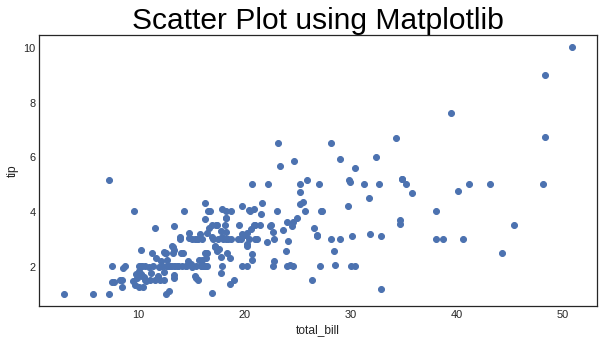

In [100]:
plt.scatter(tips['total_bill'], tips['tip'])
plt.title('Scatter Plot using Matplotlib', fontsize=30, c='black')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

Text(0.5, 1.0, 'Scatter Plot using Seaborn')

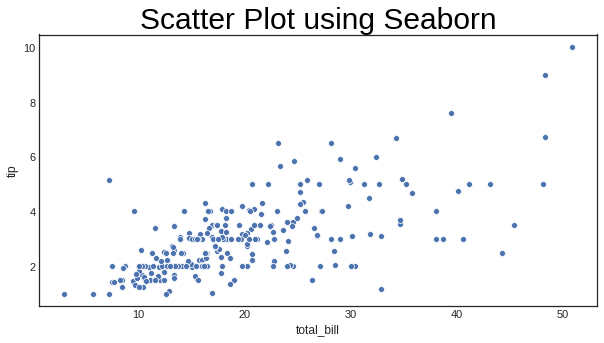

In [101]:
sns.scatterplot('total_bill','tip',data=tips)
plt.title('Scatter Plot using Seaborn', fontsize=30, c='black')

In [102]:
#plot it
fig=figure(title="Scatter Plot using Bokeh")

fig.xaxis.axis_label = 'total_bill'
fig.yaxis.axis_label = 'tip'
fig.title.text_font_size = '15pt'
fig.circle(tips['total_bill'],tips['tip'], size=7)
show(fig)

In [103]:
import altair as alt
from vega_datasets import data

alt.Chart(tips).mark_circle(size=60).encode(
    x='total_bill',
    y='tip',
    color='tip',
).properties(
    height=450,
    width=450,
    title='Scatter Plot using Altair'
).interactive()

alt.Chart(...)

# **Section 3:**

Box Plot that shows average bill amount by day of week and average bill amount by gender using Matplotlib


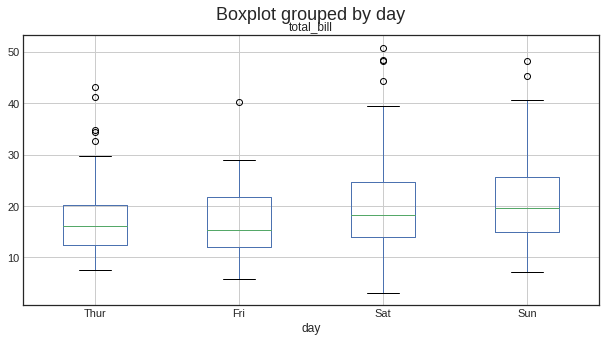

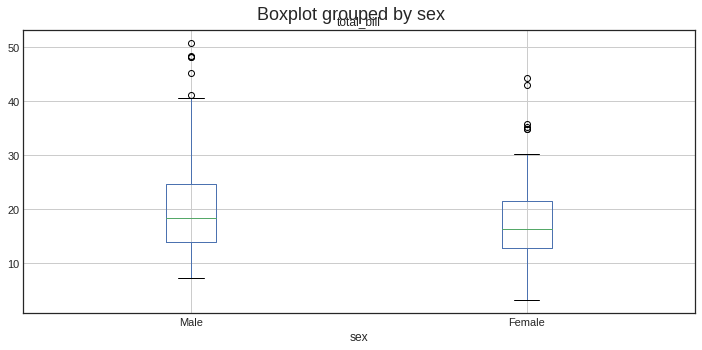

In [104]:
ax1=tips.boxplot(column='total_bill', by='day')
ax2=tips.boxplot(column='total_bill', by='sex')
plt.tight_layout()


In [105]:
tips=px.data.tips()
fig=px.box(tips,x='sex',y='total_bill')
fig1=px.box(tips,x='day',y='total_bill')
fig.show()
fig1.show()

Box Plot that shows average bill amount by day of week and average bill amount by gender using Seaborn


Text(0.5, 0.98, 'Box Plots using Seaborn')

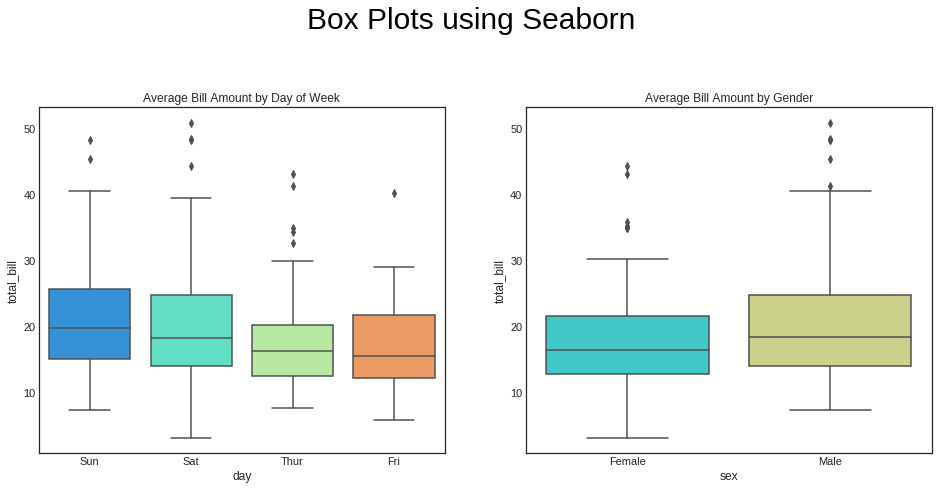

In [106]:
plt.figure(figsize=(16,14))

plt.subplot(221)
sns.boxplot(x='day',y='total_bill',data=tips,palette='rainbow')
plt.title("Average Bill Amount by Day of Week")


plt.subplot(222)
sns.boxplot(x='sex',y='total_bill',data=tips,palette='rainbow')
plt.title("Average Bill Amount by Gender")
plt.suptitle("Box Plots using Seaborn", fontsize=30, c='black')

Box Plot that shows average bill amount by day of week and average bill amount by gender using **Altair**


In [113]:
import altair as alt
from altair import *

chart_sex=alt.Chart(tips).mark_boxplot().encode(
    y='total_bill',
    x='sex',
    color='sex', 
).properties(
    height=350,
    width=500,
    title='Average Bill Amount by Gender'
).interactive()

chart_day=alt.Chart(tips).mark_boxplot().encode(
    y='total_bill',
    x='day',
    color='day'
).properties(
    height=350,
    width=500,
    title='Average Bill Amount by Day'
).interactive()

chart_sex.configure_header(
    titleColor='green',
    titleFontSize=14,
    labelColor='red',
    labelFontSize=14
)
alt.hconcat(chart_sex, chart_day)


alt.HConcatChart(...)

# **Section 4:**

**Linear Relationship between tips and total_bill**

Text(0.5, 1, 'Linear Relationship between tips and total_bill- smoker/non-smoker')

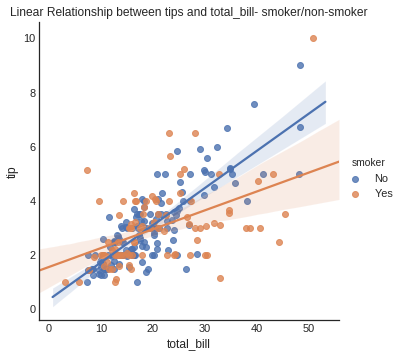

In [108]:
#Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)
plt.title("Linear Relationship between tips and total_bill- smoker/non-smoker")

Non-smokers have a steeper slope than the smokers. Non-smokers give a higher tip as a percentage of total_bill.

 However, it is observed that when the bill amount is less than $20 than smokers tips more than non-smokers.

Text(0.5, 0.98, 'Linear Relationship: Lunch & Dinner')

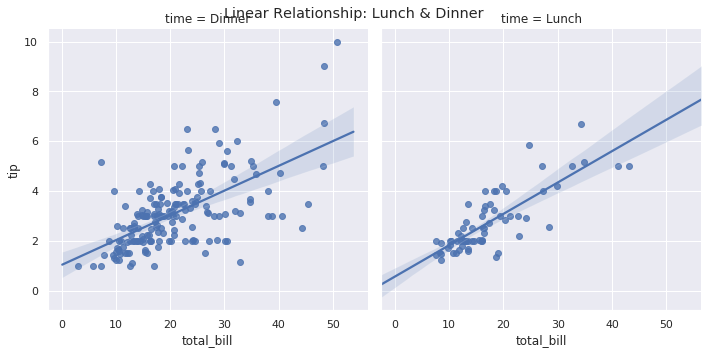

In [109]:
#Are tips larger during lunch or dinner (as a percentage of total_bill)
sns.set(font_scale=1) 
sns.lmplot(x='total_bill', y='tip', col='time', data=tips)
plt.suptitle("Linear Relationship: Lunch & Dinner")

Tips as a percentage of total_bill are higher during dinner compared to the lunch when the total_bill is less than $25. 

When it is more than $25 then lunch pays more tips.

Text(0.5, 0.98, 'Linear Relationship by Gender')

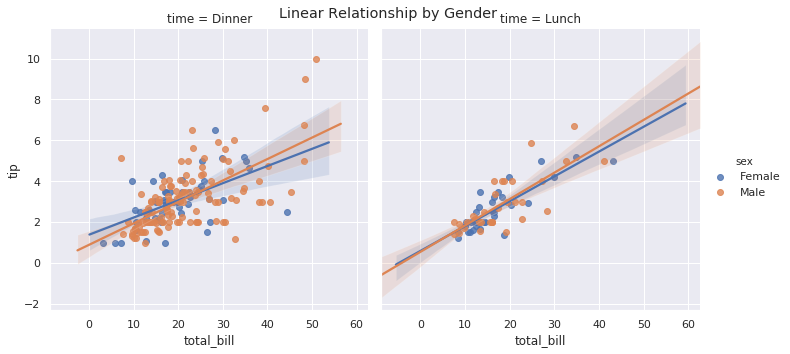

In [110]:
#Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
sns.set(font_scale=1) 
sns.lmplot(x='total_bill', y='tip', hue='sex',col='time', data=tips)
plt.suptitle("Linear Relationship by Gender")

Tips as a percentage of total_bil are higher by males than compared to females in both luch and dinner time. Males tip the most in both times. However, it is observed that when the bill amount is below $12 for dinner females tip higher than male.